In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
#import csv, parse dates
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True, sep=',')
#df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, sep=',')
print(df)

             value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]


In [15]:
#clean data
#print(df['value'].isna().sum())
#print(df['value'].astype('int').count())
df = df[(df['value'] > df['value'].quantile(.025)) & (df['value'] < df['value'].quantile(.975))]
print(len(df))

954


Text(0.5, 1.0, 'Daily FreeCodeCamp Forum Page Views 06/20/2016 - 10/06/2019')

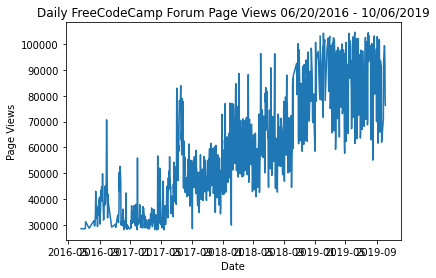

In [18]:
fig, ax = plt.subplots()
plt.plot(df['value'])
plt.xlabel("Date")
plt.ylabel("Page Views")


def formatDate (dateStr):
    return dateStr.strftime("%m/%d/%Y")
start = formatDate(df.index[0])
end = formatDate(df.index[-1])
title = "Daily FreeCodeCamp Forum Page Views " + start + ' - ' + end
plt.title(title)
#sns.lineplot(label="Page Views", data=df, xlabel='Date')